In [131]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import pprint
import json
from pprint import pprint

# import sklearn packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# import keras packages
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K

In [133]:
# reading json
with open('../input/train.json') as f:
    trainJson = json.load(f)
    
with open('../input/test.json') as f:
    testJson = json.load(f)

trainTxt = [" ".join(doc['ingredients']).lower() for doc in trainJson]
testTxt = [" ".join(doc['ingredients']).lower() for doc in testJson]  

labelsTxt = [doc['cuisine'] for doc in trainJson]


# dimensionality transformations
vec = TfidfVectorizer(binary=True)
train = vec.fit_transform(trainTxt)
test = vec.transform(testTxt)  
enc = LabelEncoder()
label = enc.fit_transform(labelsTxt)

print(train, 'train samples')
print(test, 'test samples')
print(label, 'labels')

  (0, 2295)	0.342667129117
  (0, 1527)	0.266387123701
  (0, 247)	0.139896200492
  (0, 1868)	0.261009241087
  (0, 1169)	0.350311702385
  (0, 2770)	0.151835178374
  (0, 1094)	0.105310731546
  (0, 1998)	0.102084113576
  (0, 2181)	0.239132201981
  (0, 1872)	0.164549308995
  (0, 2403)	0.23007896012
  (0, 1088)	0.38853112216
  (0, 184)	0.207488021689
  (0, 958)	0.304036176504
  (0, 522)	0.145683698668
  (0, 738)	0.33432047461
  (1, 247)	0.188204869186
  (1, 2770)	0.204266590395
  (1, 1998)	0.137335590059
  (1, 2080)	0.383109950465
  (1, 1013)	0.204525773853
  (1, 1204)	0.167815605629
  (1, 2349)	0.120820524958
  (1, 2747)	0.303471740031
  (1, 898)	0.224201096332
  :	:
  (39772, 2619)	0.278944834732
  (39772, 298)	0.278944834732
  (39772, 2599)	0.258824509439
  (39772, 2911)	0.26009923005
  (39773, 247)	0.164671369588
  (39773, 2770)	0.178724702218
  (39773, 1094)	0.12396092485
  (39773, 1998)	0.12016288317
  (39773, 1204)	0.146831618845
  (39773, 2349)	0.105712893642
  (39773, 1190)	0.184829

In [134]:
# type casting 
train = train.astype('float16')
test = test.astype('float16')
label = keras.utils.to_categorical(label)

print(train, 'train samples')
print(test, 'test samples')
print(label, 'labels')

  (0, 184)	0.20752
  (0, 247)	0.13989
  (0, 522)	0.14563
  (0, 738)	0.33423
  (0, 958)	0.30396
  (0, 1088)	0.38843
  (0, 1094)	0.10529
  (0, 1169)	0.35034
  (0, 1527)	0.26636
  (0, 1868)	0.26099
  (0, 1872)	0.16455
  (0, 1998)	0.10211
  (0, 2181)	0.23914
  (0, 2295)	0.34277
  (0, 2403)	0.2301
  (0, 2770)	0.15186
  (1, 247)	0.18823
  (1, 676)	0.24561
  (1, 898)	0.22424
  (1, 1013)	0.20447
  (1, 1190)	0.2113
  (1, 1204)	0.16785
  (1, 1666)	0.44824
  (1, 1707)	0.23584
  (1, 1860)	0.13
  :	:
  (39772, 2911)	0.26001
  (39772, 2943)	0.10303
  (39772, 2945)	0.17236
  (39772, 2954)	0.11829
  (39773, 204)	0.23694
  (39773, 247)	0.16467
  (39773, 490)	0.27515
  (39773, 545)	0.27271
  (39773, 550)	0.25562
  (39773, 577)	0.19434
  (39773, 596)	0.20508
  (39773, 861)	0.22473
  (39773, 1044)	0.14685
  (39773, 1094)	0.12396
  (39773, 1190)	0.18481
  (39773, 1204)	0.14685
  (39773, 1356)	0.28735
  (39773, 1873)	0.15491
  (39773, 1881)	0.25684
  (39773, 1998)	0.12018
  (39773, 2293)	0.4292
  (39773, 23

In [120]:
# Model (3 layers with 1000 nodes)
model = keras.Sequential()
model.add(keras.layers.Dense(1000, 
                             kernel_initializer=keras.initializers.he_normal(seed=1), 
                             activation='relu', input_dim=3010))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(1000, 
                             kernel_initializer=keras.initializers.he_normal(seed=2), 
                             activation='relu'))
model.add(keras.layers.Dropout(0.81))
model.add(keras.layers.Dense(20, 
                             kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=4), 
                             activation='softmax'))

In [135]:
# compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
# training
history = model.fit(train, label, 
                    epochs=30, 
                    batch_size=512, 
                    validation_split=0.1)
model.save_weights("model.h5")

Train on 35796 samples, validate on 3978 samples
Epoch 1/30
35796/35796 [==============================] - 30s 836us/step - loss: 0.2433 - acc: 0.9215 - val_loss: 0.8191 - val_acc: 0.8100
Epoch 2/30
35796/35796 [==============================] - 33s 909us/step - loss: 0.2406 - acc: 0.9213 - val_loss: 0.8213 - val_acc: 0.8112
Epoch 3/30
35796/35796 [==============================] - 31s 870us/step - loss: 0.2384 - acc: 0.9240 - val_loss: 0.8246 - val_acc: 0.8142
Epoch 4/30
35796/35796 [==============================] - 30s 848us/step - loss: 0.2293 - acc: 0.9263 - val_loss: 0.8243 - val_acc: 0.8140
Epoch 5/30
35796/35796 [==============================] - 29s 811us/step - loss: 0.2255 - acc: 0.9271 - val_loss: 0.8311 - val_acc: 0.8157
Epoch 6/30
35796/35796 [==============================] - 29s 805us/step - loss: 0.2261 - acc: 0.9259 - val_loss: 0.8436 - val_acc: 0.8120
Epoch 7/30
35796/35796 [==============================] - 29s 799us/step - loss: 0.2159 - acc: 0.9295 - val_loss: 0.8

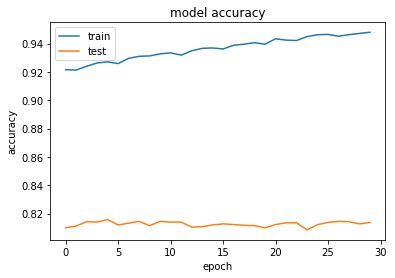

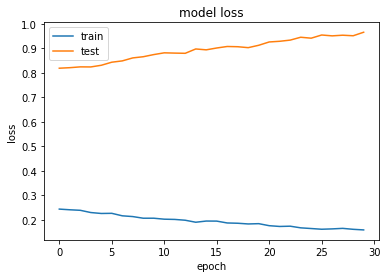

In [138]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [139]:
predictions_encoded = model.predict(test)
predictions_encoded.shape
predictions = enc.inverse_transform([np.argmax(pred) for pred in predictions_encoded])
predictions

array(['irish', 'southern_us', 'italian', ..., 'italian', 'southern_us',
       'mexican'], 
      dtype='<U12')

In [140]:
# print train and test losses and classification accuracies
score = model.evaluate(train, label, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.118826057303
Train accuracy: 0.976316186462


In [141]:
Number_id = [doc['id'] for doc in testJson]
sub = pd.DataFrame({'id': Number_id, 'cuisine': predictions}, columns=['id', 'cuisine'])
sub.to_csv('output.csv', index=False)